In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['CONFIG_DIR'] = "/content/gdrive/My Drive/Project"
%cd /content/gdrive/My Drive/Project
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Project
kitti/  output/  readme.txt


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load json and create model
json_file = open('output/model/model_car.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_car = model_from_json(loaded_model_json)
# load weights into new model
model_car.load_weights("output/model/model_car.h5")
print("Loaded model from disk")

# load json and create model
json_file = open('output/model/model_pedestrian.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_pedestrian = model_from_json(loaded_model_json)
# load weights into new model
model_pedestrian.load_weights("output/model/model_pedestrian.h5")
print("Loaded model from disk")



Loaded model from disk
Loaded model from disk


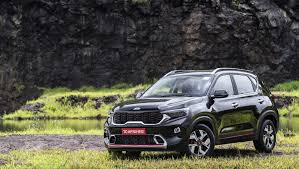

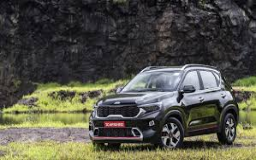

In [4]:
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request
import cv2

resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTE9c29pZr-4BFjUSdqaTgtH7MqnOjACLSSyQ&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxGtFzjxRpVo_zQzfwk6yUq7Wj2Ma8j-B60Q&usqp=CAU")
#resp = urllib.request.urlopen("https://media.wired.com/photos/5d09594a62bcb0c9752779d9/125:94/w_1994,h_1500,c_limit/Transpo_G70_TA-518126.jpg")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsdqj-Fv1dfjHPOMjEuXj1gwXYpRJVNcJH5g&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjAfga3YP7heHxnwOWOWU1DZSJ3L1IG9fQ5Q&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKuHN0YMOFcPD2RI_NzGGz761wXPym2QlPpA&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT47K7t7qU6_DcSRVqLfRWNYVx1_zo3ztoxKg&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUzx4agTFQ6-ZSe6boJ4AR5DglI6GGog_gTg&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHMuGAMVsKXiatvq6RJbAe0WWbvUklVxYYFw&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZc8wwYZoMa3g8N_XbnCjaX5qW674-IP6Yfw&usqp=CAU")
#resp = urllib.request.urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbYvNkjksX4cCKsVPbRIFd8Xbp7Uxq6d7Bgg&usqp=CAU")

image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

cv2_imshow(image)

resized_shape = (160,256)
test_img = cv2.resize(image,(resized_shape[1],resized_shape[0]))
img= test_img.copy()
cv2_imshow(test_img)


In [5]:

img = test_img.copy()
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

from google.colab.patches import cv2_imshow

pred_all_car= model_car.predict(test_img)
np.shape(pred_all_car)

pred_all_pedestrian= model_pedestrian.predict(test_img)
np.shape(pred_all_pedestrian)



(1, 160, 256, 1)

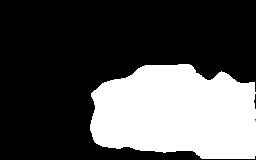

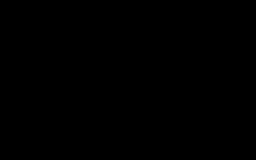

In [6]:

x = np.array(255*pred_all_car[0],dtype=np.uint8)
cv2_imshow(x)


x = np.array(255*pred_all_pedestrian[0],dtype=np.uint8)
cv2_imshow(x)


Prediction


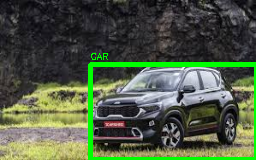

In [7]:

im_pred_car = np.array(255*pred_all_car[0],dtype=np.uint8)
rgb_mask_box= im_pred_car
ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
img2 = img.copy()
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(rgb_mask_box, contours, -1, (0,255,0), 3)
for c in contours:
  rect = cv2.boundingRect(c)
  x,y,w,h = rect
  cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
  cv2.putText(img2,'CAR',(x,y-5),0,0.3,(0,255,0))



im_pred_pedestiran = np.array(255*pred_all_pedestrian[0],dtype=np.uint8)
rgb_mask_box= im_pred_pedestiran
ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
img3 = img2.copy()
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(rgb_mask_box, contours, -1, (255,0,0), 3)
for c in contours:
  rect = cv2.boundingRect(c)
  x,y,w,h = rect
  cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),3)
  cv2.putText(img3,'PEDESTRIAN',(x,y-5),0,0.3,(255,0,0))



print("Prediction")
cv2_imshow(img3)
